### 数据变换
1. 规范化  
2. 连续属性离散化  
3. #属性构造  

#### 标准化/规范化
0/1 规范化

In [1]:
from sklearn import datasets
import pandas as pd

boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data[:, 4:7])
boston_df.columns = boston.feature_names[4:7]

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
NOX    506 non-null float64
RM     506 non-null float64
AGE    506 non-null float64
dtypes: float64(3)
memory usage: 11.9 KB


> 最小/最大规范化

In [6]:
reg = (boston_df - boston_df.min())/(boston_df.max()-boston_df.min())

In [7]:
reg.head()

,NOX,RM,AGE
0,0.314815,0.577505,0.641607
1,0.172840,0.547998,0.782698
2,0.172840,0.694386,0.599382
3,0.150206,0.658555,0.441813
4,0.150206,0.687105,0.528321


#### 最大最小规范化包

In [8]:
#最大最小规范化包
from sklearn import preprocessing
min_max_scaler = preprocessing.minmax_scale(boston_df)

In [12]:
pd.DataFrame(min_max_scaler).head()

,0,1,2
0,0.314815,0.577505,0.641607
1,0.172840,0.547998,0.782698
2,0.172840,0.694386,0.599382
3,0.150206,0.658555,0.441813
4,0.150206,0.687105,0.528321


In [13]:
# -1 dao 1
maxabs_scaler = preprocessing.maxabs_scale(boston_df)
pd.DataFrame(maxabs_scaler).head()

,0,1,2
0,0.617681,0.748861,0.652
1,0.538462,0.731321,0.789
2,0.538462,0.818337,0.611
3,0.525832,0.797039,0.458
4,0.525832,0.814009,0.542


### z-score 规范化

##### (x - x.mean())/sigma

In [14]:
((boston_df - boston_df.mean())/boston_df.std()).head()

,NOX,RM,AGE
0,-0.144075,0.413263,-0.119895
1,-0.739530,0.194082,0.366803
2,-0.739530,1.281446,-0.265549
3,-0.834458,1.015298,-0.809088
4,-0.834458,1.227362,-0.510674


In [16]:
scaler = preprocessing.scale(boston_df)
pd.DataFrame(scaler).head()

,0,1,2
0,-0.144217,0.413672,-0.120013
1,-0.740262,0.194274,0.367166
2,-0.740262,1.282714,-0.265812
3,-0.835284,1.016303,-0.809889
4,-0.835284,1.228577,-0.511180


### 小数定标规范化
x1 = x/10^j

In [20]:
import numpy as np
(boston_df/np.ceil(boston_df)).head()

,NOX,RM,AGE
0,0.538,0.939286,0.987879
1,0.469,0.917286,0.998734
2,0.469,0.898125,0.985484
3,0.458,0.999714,0.995652
4,0.458,0.893375,0.985455


### 连续属性离散化(分箱binning)

In [ ]:
pd.cut(boston_df.AGE , 5 , labels = range(5))

### 数据规约 value reduction

In [ ]:
属性规约
数值规约

In [26]:
h = np.random.randint(1,10,50)
h.list

array([3, 9, 9, 1, 3, 1, 5, 1, 1, 6, 4, 9, 1, 4, 3, 3, 3, 1, 7, 8, 2, 3,
       6, 8, 4, 1, 9, 3, 2, 7, 4, 6, 4, 5, 6, 3, 3, 4, 5, 6, 6, 4, 5, 5,
       2, 3, 6, 4, 2, 8])

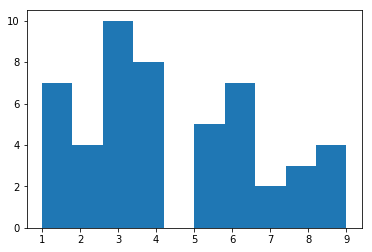

In [29]:
import matplotlib.pyplot as plt
plt.hist(h)
plt.show()

In [31]:
bins = np.linspace(h.min() , h.max() , 3 , endpoint = True)
bins

array([1., 5., 9.])

(array([29., 21.]), array([1., 5., 9.]), <a list of 2 Patch objects>)

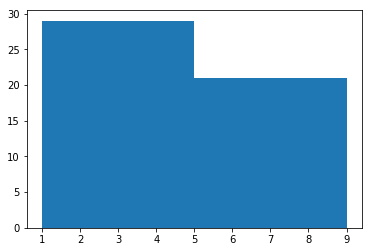

In [32]:
plt.hist(h,bins)

(array([29., 21.]), array([1., 5., 9.]), <a list of 2 Patch objects>)

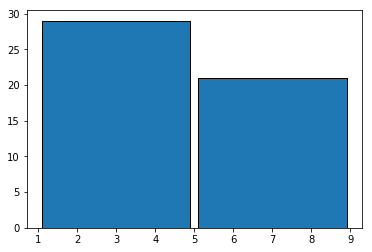

In [33]:
plt.hist(h,bins = bins , rwidth = 0.95 , edgecolor = 'k')

(array([11., 23., 16.]), array([1., 3., 6., 9.]), <a list of 3 Patch objects>)

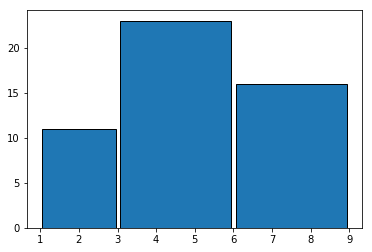

In [35]:
# 自定义bins
binn = np.array([1.,3.,6.,9.])
plt.hist(h,bins = binn , rwidth = 0.95 , edgecolor = 'k')

### 随机抽样

In [37]:
# 随机抽样
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
iris_df.sample(n = 10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
19,5.1,3.8,1.5,0.3
123,6.3,2.7,4.9,1.8
112,6.8,3.0,5.5,2.1
35,5.0,3.2,1.2,0.2
137,6.4,3.1,5.5,1.8
141,6.9,3.1,5.1,2.3
94,5.6,2.7,4.2,1.3
140,6.7,3.1,5.6,2.4
16,5.4,3.9,1.3,0.4
147,6.5,3.0,5.2,2.0


In [39]:
iris_df.sample(frac = 0.1) #fraction 比例

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
64,5.6,2.9,3.6,1.3
20,5.4,3.4,1.7,0.2
19,5.1,3.8,1.5,0.3
148,6.2,3.4,5.4,2.3
123,6.3,2.7,4.9,1.8
89,5.5,2.5,4.0,1.3
81,5.5,2.4,3.7,1.0
35,5.0,3.2,1.2,0.2
29,4.7,3.2,1.6,0.2
90,5.5,2.6,4.4,1.2


In [40]:
#有放回
iris_df.sample(frac = 0.1 , replace = True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
69,5.6,2.5,3.9,1.1
145,6.7,3.0,5.2,2.3
59,5.2,2.7,3.9,1.4
0,5.1,3.5,1.4,0.2
75,6.6,3.0,4.4,1.4
51,6.4,3.2,4.5,1.5
113,5.7,2.5,5.0,2.0
0,5.1,3.5,1.4,0.2
7,5.0,3.4,1.5,0.2
50,7.0,3.2,4.7,1.4


### 分层抽样

In [42]:
iris_df.shape

(150, 4)

In [44]:
iris_df['target'] = iris.target
iris_df[iris_df.target==1].sample(n = 10)
# 在1中抽10个

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
60,5.0,2.0,3.5,1.0,1
73,6.1,2.8,4.7,1.2,1
67,5.8,2.7,4.1,1.0,1
92,5.8,2.6,4.0,1.2,1
81,5.5,2.4,3.7,1.0,1
58,6.6,2.9,4.6,1.3,1
90,5.5,2.6,4.4,1.2,1
94,5.6,2.7,4.2,1.3,1
50,7.0,3.2,4.7,1.4,1
85,6.0,3.4,4.5,1.6,1


In [46]:
# x 为每一组
iris_df.groupby('target').apply(lambda x : x.sample(n = 10) )

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                               
0      18                 5.7               3.8                1.7   
       36                 5.5               3.5                1.3   
       45                 4.8               3.0                1.4   
       34                 4.9               3.1                1.5   
       13                 4.3               3.0                1.1   
       25                 5.0               3.0                1.6   
       30                 4.8               3.1                1.6   
       22                 4.6               3.6                1.0   
       39                 5.1               3.4                1.5   
       28                 5.2               3.4                1.4   
1      94                 5.6               2.7                4.2   
       69                 5.6               2.5                3.9   
       73                 6.1               2.8                4.7   
       93                 5.0               2.3                3.3   
       76                 6.8               2.8                4.8   
       60                 5.0               2.0                3.5   
       63                 6.1               2.9                4.7   
       99                 5.7               2.8                4.1   
       64                 5.6               2.9                3.6   
       54                 6.5               2.8                4.6   
2      130                7.4               2.8                6.1   
       147                6.5               3.0                5.2   
       127                6.1               3.0                4.9   
       137                6.4               3.1                5.5   
       104                6.5               3.0                5.8   
       110                6.5               3.2                5.1   
       149                5.9               3.0                5.1   
       128                6.4               2.8                5.6   
       136                6.3               3.4                5.6   
       101                5.8               2.7                5.1   

            petal width (cm)  target  
target                                
0      18                0.3       0  
       36                0.2       0  
       45                0.3       0  
       34                0.2       0  
       13                0.1       0  
       25                0.2       0  
       30                0.2       0  
       22                0.2       0  
       39                0.2       0  
       28                0.2       0  
1      94                1.3       1  
       69                1.1       1  
       73                1.2       1  
       93                1.0       1  
       76                1.4       1  
       60                1.0       1  
       63                1.4       1  
       99                1.3       1  
       64                1.3       1  
       54                1.5       1  
2      130               1.9       2  
       147               2.0       2  
       127               1.8       2  
       137               1.8       2  
       104               2.2       2  
       110               2.0       2  
       149               1.8       2  
       128               2.1       2  
       136               2.4       2  
       101               1.9       2

In [48]:
iris_df.groupby('target').apply(lambda x : x.name)

target
0    0
1    1
2    2
dtype: int64

In [50]:
d = {0:0.15 , 1:0.05 , 2:0.1 }
iris_df.groupby('target').apply(lambda x : x.sample(frac = d[x.name]) )

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                               
0      36                 5.5               3.5                1.3   
       39                 5.1               3.4                1.5   
       41                 4.5               2.3                1.3   
       14                 5.8               4.0                1.2   
       0                  5.1               3.5                1.4   
       38                 4.4               3.0                1.3   
       29                 4.7               3.2                1.6   
       49                 5.0               3.3                1.4   
1      71                 6.1               2.8                4.0   
       89                 5.5               2.5                4.0   
2      131                7.9               3.8                6.4   
       129                7.2               3.0                5.8   
       106                4.9               2.5                4.5   
       124                6.7               3.3                5.7   
       133                6.3               2.8                5.1   

            petal width (cm)  target  
target                                
0      36                0.2       0  
       39                0.2       0  
       41                0.3       0  
       14                0.2       0  
       0                 0.2       0  
       38                0.2       0  
       29                0.2       0  
       49                0.2       0  
1      71                1.3       1  
       89                1.3       1  
2      131               2.0       2  
       129               1.6       2  
       106               1.7       2  
       124               2.1       2  
       133               1.5       2